In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Data Preparation

In [5]:
#1. Regularize the column names
df.columns = df.columns.str.capitalize().str.replace(" ", "_")

In [7]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
# Regularize the string columns
## First find which columns are strings
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_fuel_type      object
Engine_hp            float64
Engine_cylinders     float64
Transmission_type     object
Driven_wheels         object
Number_of_doors      float64
Market_category       object
Vehicle_size          object
Vehicle_style         object
Highway_mpg            int64
City_mpg               int64
Popularity             int64
Msrp                   int64
dtype: object

In [13]:
## Get the columns that are objects
df.dtypes[df.dtypes == "object"]

Make                 object
Model                object
Engine_fuel_type     object
Transmission_type    object
Driven_wheels        object
Market_category      object
Vehicle_size         object
Vehicle_style        object
dtype: object

In [14]:
## Get access to the indices
df.dtypes[df.dtypes == "object"].index

Index(['Make', 'Model', 'Engine_fuel_type', 'Transmission_type',
       'Driven_wheels', 'Market_category', 'Vehicle_size', 'Vehicle_style'],
      dtype='object')

In [15]:
## COnvert to a python list
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['Make',
 'Model',
 'Engine_fuel_type',
 'Transmission_type',
 'Driven_wheels',
 'Market_category',
 'Vehicle_size',
 'Vehicle_style']

In [16]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [18]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [22]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print(df[i].nunique())
    print()

Make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

Year
[2011 2012 2013 1992 1993]
28

Engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

Engine_hp
[335. 300. 230. 320. 172.]
356

Engine_cylinders
[ 6.  4.  5.  8. 12.]
9

Transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

Number_of_doors
[ 2.  4.  3. nan]
3

Market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

Vehicle_size
['compact' 'midsize' 'large']
3

Vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

Highway_mpg
[26 28 27 25 24]
59

City_mpg
[19 20 18 17 16]
69

Popularity
[3916 3105  819  617 1013]
48

Msrp
[46135 40650 36350 29450 345

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Msrp', ylabel='Count'>

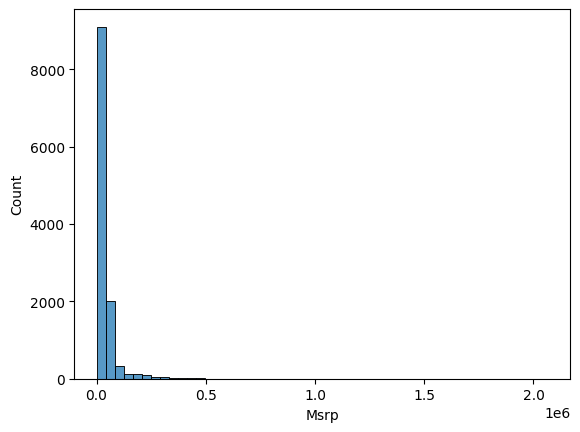

In [25]:
# Plot histogram of price
sns.histplot(df.Msrp, bins =50)

<Axes: xlabel='Msrp', ylabel='Count'>

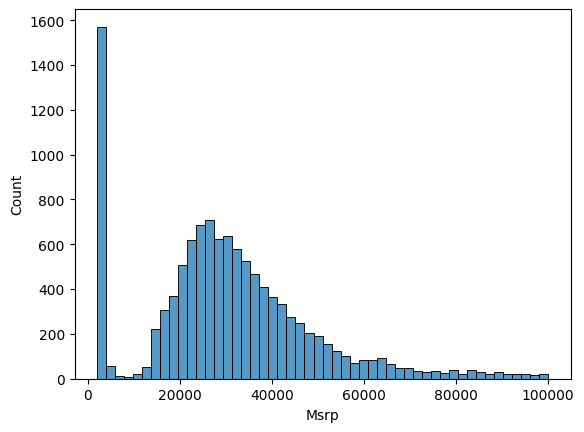

In [26]:
# Let us look at the distribution of prices less than 100k
sns.histplot(df.Msrp[df.Msrp < 100000], bins = 50)

Most of the prices are clustered around 1000. Entering this kind of data into our model will throw off the model because of the price variations. 
A way to resolve this is taking the logarithm of the values. This transforms the data into simpler units. If we have data with zeros, logarithm of zero will throw an error so we use log[x+1]. Numpy solves this for us with the function log1p.

In [27]:
price_logs = np.log1p(df.Msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: Msrp, Length: 11914, dtype: float64

<Axes: xlabel='Msrp', ylabel='Count'>

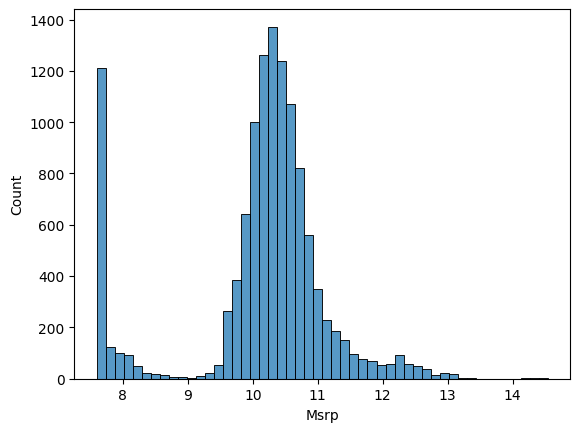

In [28]:
# Visualize
sns.histplot(price_logs, bins = 50)

In [29]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_fuel_type        3
Engine_hp              69
Engine_cylinders       30
Transmission_type       0
Driven_wheels           0
Number_of_doors         6
Market_category      3742
Vehicle_size            0
Vehicle_style           0
Highway_mpg             0
City_mpg                0
Popularity              0
Msrp                    0
dtype: int64

## Setting up validation framework

We will split the dataset into 60% training, 20% validation and 20% testing.

In [30]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n- n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [43]:
# Create a range of numbers from 0 to n
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [46]:
# Shuffle the numbers
np.random.seed(2)
rng = np.random.default_rng()
rng.shuffle(idx)

In [47]:
idx

array([ 6540,  9566, 11686, ..., 11548,  2811,  7531])

In [55]:
df_train = df.iloc[idx[: n_train ]]
df_val = df.iloc[idx[n_train: n_train+ n_val]]
df_test = df.iloc[idx[n_train+ n_val:]]

In [56]:
df_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
6540,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155,29230
9566,chevrolet,silverado_1500,2016,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,1385,53315
11686,suzuki,xl-7,2006,regular_unleaded,185.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,481,25499
5652,volkswagen,gti,2013,premium_unleaded_(recommended),200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,31,21,873,24795
5048,infiniti,fx35,2008,premium_unleaded_(required),275.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,22,15,190,38050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,lexus,rc_200t,2016,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,coupe,32,22,454,39995
4562,ford,f-150,2017,flex-fuel_(unleaded/e85),282.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,25,18,5657,31905
10079,plymouth,sundance,1992,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,23,535,2000
8002,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,21,873,16675


In [57]:
df_val

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
1513,cadillac,ats_coupe,2016,regular_unleaded,335.0,6.0,automatic,all_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,19,1624,51945
5641,volkswagen,gti,2013,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,33,24,873,25895
9275,gmc,sierra_1500_classic,2007,regular_unleaded,295.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,19,14,549,28915
4610,ford,f-250,1997,regular_unleaded,220.0,8.0,manual,rear_wheel_drive,3.0,NaN,large,extended_cab_pickup,17,12,5657,3156
6738,nissan,maxima,2017,premium_unleaded_(recommended),300.0,6.0,automatic,front_wheel_drive,4.0,high-performance,midsize,sedan,30,21,2009,37870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,infiniti,m,2012,premium_unleaded_(required),330.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,24,17,190,49850
3136,ford,crown_victoria,2009,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29205
48,bmw,2_series,2016,premium_unleaded_(required),320.0,6.0,automatic,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,30,20,3916,46150
4565,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,38325


In [58]:
df_test

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
9639,chevrolet,silverado_1500,2017,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,1385,37425
696,maybach,62,2010,premium_unleaded_(required),604.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",large,sedan,16,10,67,456500
1590,toyota,avalon_hybrid,2016,regular_unleaded,200.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,39,40,2031,38100
9367,gmc,sierra_1500,2016,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,549,31655
10336,toyota,tercel,1998,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,27,2031,2148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7626,honda,pilot,2017,regular_unleaded,280.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,26,19,2202,47070
8811,gmc,s-15,1990,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,extended_cab_pickup,19,15,549,2000
11548,scion,xb,2015,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,28,22,105,18070
2811,dodge,colt,1992,regular_unleaded,92.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,1851,2000


In [59]:
## We can reset the indices if we'd like
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [60]:
## Log transform y vector
y_train = np.log1p(df_train.Msrp.values)
y_test = np.log1p(df_test.Msrp.values)
y_val = np.log1p(df_val.Msrp.values)

In [62]:
# Remove price from X matrix
del df_train["Msrp"]
del df_test["Msrp"]
del df_val["Msrp"]

In [63]:
df_train


,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,buick,lucerne,2010,flex-fuel_(unleaded/e85),227.0,6.0,automatic,front_wheel_drive,4.0,flex_fuel,large,sedan,26,17,155
1,chevrolet,silverado_1500,2016,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,1385
2,suzuki,xl-7,2006,regular_unleaded,185.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,481
3,volkswagen,gti,2013,premium_unleaded_(recommended),200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,31,21,873
4,infiniti,fx35,2008,premium_unleaded_(required),275.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,22,15,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,lexus,rc_200t,2016,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,coupe,32,22,454
7146,ford,f-150,2017,flex-fuel_(unleaded/e85),282.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,25,18,5657
7147,plymouth,sundance,1992,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,23,535
7148,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,21,873
